# Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data

In [2]:
# Set a path

path = r'C:\Users\Tina\Desktop\CareerFoundry\Data Analytics Immersion\Instacart Basket Analysis'

In [3]:
# Import order_products_flagged

ords_prods_flag = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_flagged_an.pkl'))

# Bar Charts

<Axes: xlabel='orders_day_of_week'>

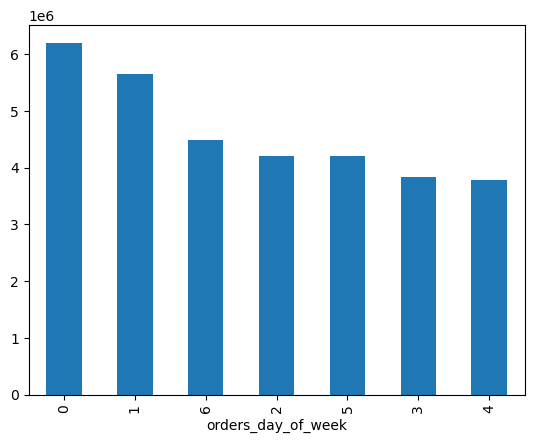

In [4]:
# Create a bar chart for oders_day_of_week

ords_prods_flag['orders_day_of_week'].value_counts().plot.bar()

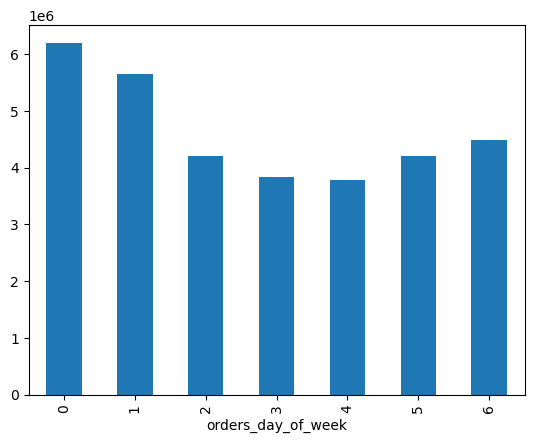

In [5]:
# With the days in chronological order

bar = ords_prods_flag['orders_day_of_week'].value_counts().sort_index().plot.bar()

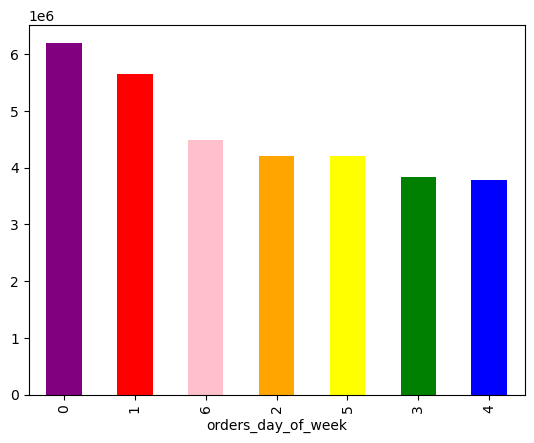

In [6]:
# Using color on the bars

bar = ords_prods_flag['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# Export Figure

In [7]:
# Export the bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

# Histograms

<Axes: ylabel='Frequency'>

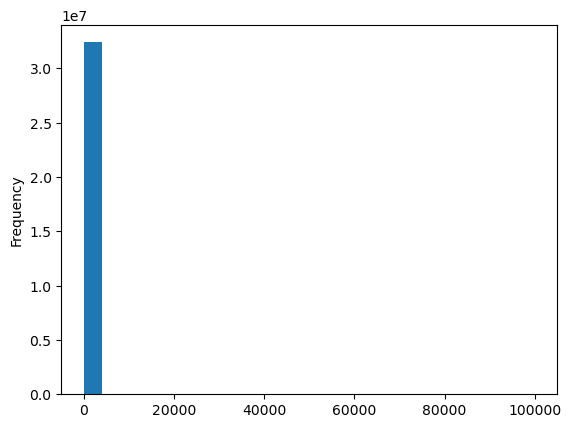

In [8]:
ords_prods_flag['prices'].plot.hist(bins = 25)

In [4]:
ords_prods_flag['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

# Scatterplots

<Axes: xlabel='prices', ylabel='prices'>

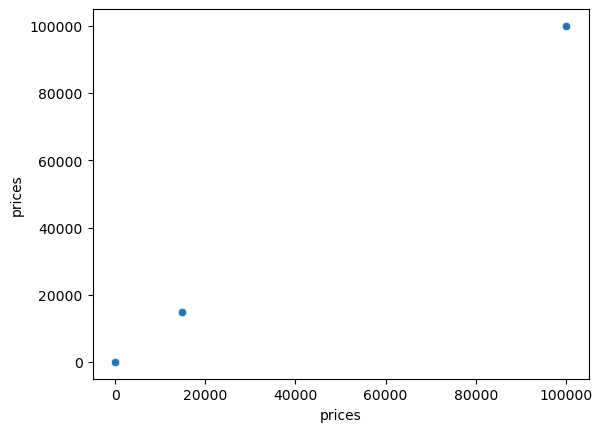

In [10]:
# Create a scatterplot of "prices"

sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_flag)

In [11]:
# Check for outliers (prices > $100)

ords_prods_flag.loc[ords_prods_flag['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,median_days_since_prior_order,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High range product,Busiest day,Busiest day,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High range product,Regularly busy,Busiest day,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High range product,Busiest day,Busiest day,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High range product,Busiest day,Busiest day,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High range product,Regularly busy,Least busy,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High range product,Regularly busy,Least busy,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [5]:
# Mark outliers as missing

ords_prods_flag.loc[ords_prods_flag['prices'] > 100, 'prices'] = np.nan

In [6]:
# Check for success by looking for max price value

ords_prods_flag['prices'].max()

25.0

In [8]:
# Export the dataframe

ords_prods_flag.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_clean.pkl'))

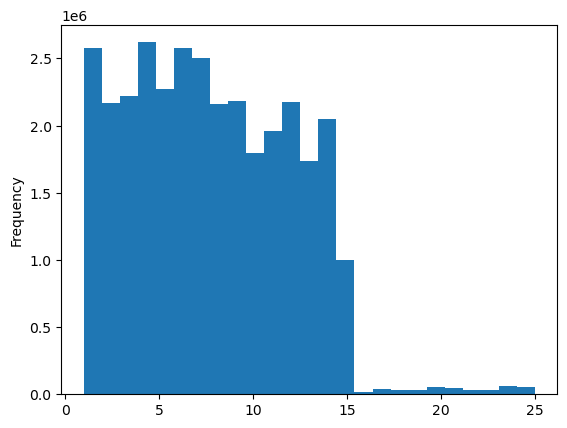

In [14]:
# Redo the histogram

hist = ords_prods_flag['prices'].plot.hist(bins = 25)

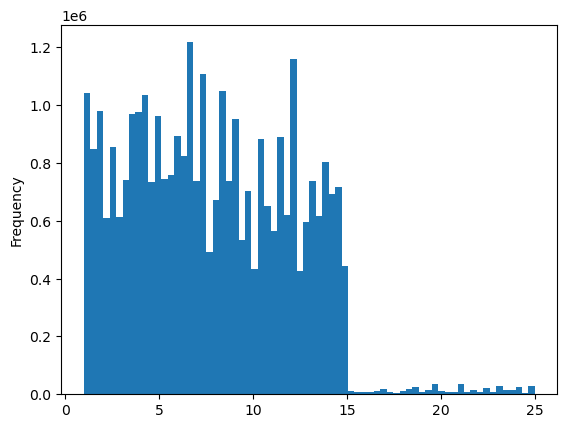

In [15]:
# Increase level of granularity

hist_2 = ords_prods_flag['prices'].plot.hist(bins = 70)

# Export Histogram

In [16]:
# Export the histogram

hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

# Sampling

In [17]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7

dev = np.random.rand(len(ords_prods_flag)) <= 0.7

In [18]:
# Store 70% of the sample in the dataframe big

big = ords_prods_flag[dev]

In [19]:
# Store 30% of the sample in the dataframe small

small = ords_prods_flag[~dev]

In [20]:
# Check that big + small = ords_prods_flag

len(ords_prods_flag)

32404859

In [21]:
len(big) + len(small)

32404859

In [22]:
# Reduce dataframe to only the needed columns

df_2 = small[['orders_day_of_week', 'prices']]

C:\Users\Tina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


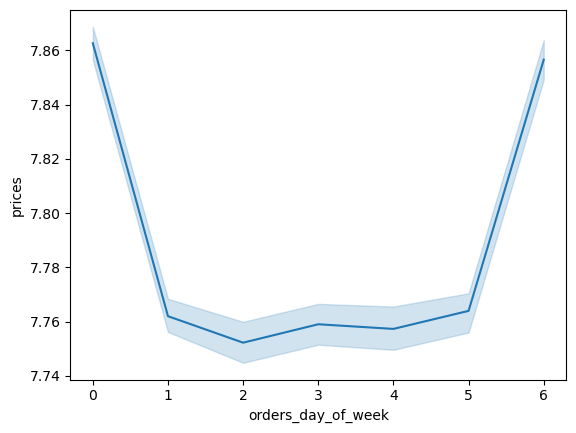

In [23]:
# Create a line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

# Export Line Chart

In [24]:
# Export the line chart

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_orders_dow.png'))